<a href="https://colab.research.google.com/github/asidosaputra/rock-physics-modelling/blob/master/01_display_well.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Display Data LAS-Log ASCII Standard

Pada  sekmen ini akan dibahas bagaimana membaca data sumur atau data LAS(_Log ASCII Standard_), kemudian menampilkan _ploting_ parameter petrofisika  terhadap kedalaman dengan menggunakan bahasa python. Modul atau _library_ untuk membaca data LAS, menggunakan Las-converter, modul yang telah saya tulis sebelumnya, modul ini dapat membaca data LAS, kemudian mengkonversi kedalam format data Dictionary dan JSON File. Info lengkap mengenai Las-converter dapat dilihat pada link berikut : https://pypi.org/project/las-converter/  




### 01. Import Library

#### Pertama _import library_ yang diperlukan, diantaranya :
1. Numpy : Modul untuk pengolahan numerik
2. Matplotlib : Modul yang digunakan untuk visualisasi data
3. Pandas     : Modul yang digunakan untuk analisis data dan data frame 
4. Las-converter : Modul yang digunakan untuk membaca data LAS

In [7]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/Colab Notebooks/ASD-02.LAS'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
!pip install las-converter

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from LAS import Converter

### 02. Read Data LAS
Data LAS dibaca menggunakan las-converter, data LAS setelah dibaca disimpan kedalam _Dictionary Data Structure_. Pada script ini data disimpan dengan _object/variable_ bernama df.

**Note** : Pastikan alamat _directory_ benar, untuk memudahkan file .las dengan file _script_ dibuat dalam satu folder, sehingga tidak perlu menuliskan alamat lengkap directory cukup nama file dan ekstensi saja, namun lebih baik data .las dibuat difolder yang berbeda agar struktur file lebih rapih.

In [9]:
# Open LAS File
C = Converter()
df = C.set_file(path).data

# Convert df from dictionary file structure to DataFrame file structure using pandas

df = pd.DataFrame(df)

print('Sepuluh baris awal :')
print(df.head(10))


print('\nSepuluh baris akhir :')
print(df.tail(10))

# Delete row with NaN data
df = df.dropna()

Sepuluh baris awal :
   dept  dt  gr  rhob
0   0.0 NaN NaN   NaN
1   0.1 NaN NaN   NaN
2   0.2 NaN NaN   NaN
3   0.3 NaN NaN   NaN
4   0.4 NaN NaN   NaN
5   0.5 NaN NaN   NaN
6   0.6 NaN NaN   NaN
7   0.7 NaN NaN   NaN
8   0.8 NaN NaN   NaN
9   0.9 NaN NaN   NaN

Sepuluh baris akhir :
         dept       dt       gr    rhob
32990  3299.0  67.8897  35.3711  2.4412
32991  3299.1  67.8897  35.3711  2.4412
32992  3299.2  67.8897  35.3711  2.4412
32993  3299.3  67.8897  35.3711  2.4412
32994  3299.4  67.8897  35.3711  2.4412
32995  3299.5  67.8897  35.3711  2.4412
32996  3299.6  67.8897  35.3711  2.4412
32997  3299.7  67.8897  35.3711  2.4412
32998  3299.8  67.8897  35.3711  2.4412
32999  3299.9  67.8897  35.3711  2.4412


Data las dalam format dictionary(df) kemudian diubah kedalam data frame pandas untuk memudahkan data analysis nantinya. Kemudian sampel data LAS ditampilkan pada script diatas, terlihat bahwa data LAS yang digunakan terdiri dari log sonic(dt), gamma-ray(dr) dan densitas(rhob). Pada kedalaman yang lebih dangkal biasanya pengukuran properti petrofisika tidak dilakukan, sehingga beberapa data akan muncul NaN(yang artinya data kosong), untuk menghilangkan data kosong tersebut, dapat digunakan fungsi pandas dropna().


### 03. Display Log

In [0]:
def displaylog(well, top_depth, bottom_depth):

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(8, 10), sharey=True)
    fig.subplots_adjust(top=0.85, wspace=0.2)

    for axes in ax:
        axes.set_ylim(top_depth, bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)

    # 1st plot: GR
    ax0 = ax[0].twiny()
    ax0.set_xlim(min(well['gr']), max(well['gr']))
    ax0.tick_params(color='green', labelcolor='green', labelsize=12)
    ax0.spines['top'].set_position(('outward', 10))
    ax0.set_xlabel("GR [API]", color='blue')
    ax[0].set_ylabel("Depth[m]", color='b', size=16)
    ax0.set_ylabel('Depth [m]', color='blue')
    ax0.tick_params(axis='x', colors='blue')
    ax0.plot(well['gr'], well['dept'], label='GR [API]', color='blue',linewidth=1)
    ax0.grid(True,linestyle='--')

    # 2st plot: dt
    ax1 = ax[1].twiny()
    ax1.set_xlim(min(well['dt']), max(well['dt']))
    ax1.tick_params(color='green', labelcolor='green', labelsize=12)
    ax1.spines['top'].set_position(('outward', 12))
    ax1.set_xlabel("Sonic [μs/ft]", color='red')
    ax1.tick_params(axis='x', colors='red')
    ax1.plot(well['dt'], well['dept'], label='P-Wave [km/s]', color='red',linewidth=1)
    ax1.grid(True,linestyle='--')

    # 3st plot: rhob
    ax2 = ax[2].twiny()
    ax2.set_xlim(min(well['rhob']), max(well['rhob']))
    ax2.tick_params(color='green', labelcolor='green', labelsize=12)
    ax2.spines['top'].set_position(('outward', 0))
    ax2.set_xlabel("RHOB [gr/cc]", color='black')
    ax2.tick_params(axis='x', colors='black')
    ax2.plot(well['rhob'], well['dept'], label='S-Wave [km/s]', color='black',linewidth=1)
    ax2.grid(True,linestyle='--')

Kemudian, panggil fungsi **displaylog** diatas dengan memasukkan input berupa data sumur, dan interval kedalaman sumur(_top and base depth_)

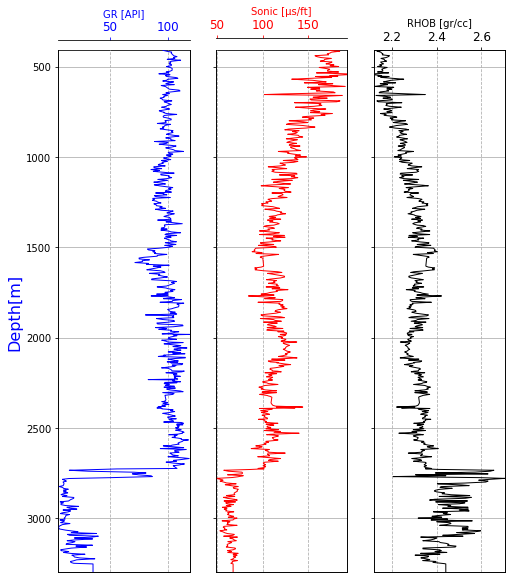

In [11]:
displaylog(df, min(df['dept']), max(df['dept']))

Selain data yang tersedia, pada data sumur, data lain juga dapat di _generate_, dengan menggunkan pemodelan petrofisika maupun fisika batuan.